## Implementação da *Fast Fourier Transform* em Python
***

Aluno: ```Alysson Machado de Oliveira Barbosa```

In [1]:
# Importação dos pacotes utilitários
import numpy as np
import matplotlib.pyplot as plt

Vamos definir o algoritmo *Fast Fourier Transform* (FFT), um algoritmo que nos ajuda a entender o comportamento de vários sinais no domínio da frequência. A ideia da FFT é conseguir calcular as frequências de um sinal de uma forma rápida e eficiente, utilizando uma estrutura matemática que reduz drasticamente o número de operações necessárias para alcançar seu objetivo, o tornando um algoritmo extremamente eficiente e utilizando em diversas áreas de aplicações.

Vamos definir algumas considerações sobre esse algoritmo, baseado em todas as explicações feitas em sala de aula. Primeiramente, a definição matemática da FFT é dada por:

$X[k] = \sum_{r=0}^{\frac{N}{2} - 1} X_{e}(n)(W_{\frac{N}{2}})^{kr} + W_{N}^{k}\sum_{r=0}^{\frac{N}{2} - 1} X_{o}(n)(W_{\frac{N}{2}})^{kr}$

Sendo $X[k]$ o resultado da FFT, $x(n)$ o sinal no domínio do tempo e $x_e(n)$ os números pares e $x_o(n)$ os índices ímpares do sinal $x(t)$.

Desse modo, podemos definir:

$X[k] = X_e[k] + W_{N}^{k}X_o[k]$

Essa última equação será útil na definição do nosso algoritmo. Agora, vamos considerar a estrutura de grafo abaixo, chamada de diagrama de borboleta pelo seu formato. Em cada estágio, as operações são organizadas de forma que os cálculos sejam realizados em pares de valores do sinal. Isso é chamado de "diagrama de borboleta" porque os valores são combinados e recalculados de uma maneira que lembra as asas de uma borboleta se movendo.

No exemplo abaixo, o sinal tem tamanho 8, e pela definição, serão necessários $log_2(8) = 3$ estágios para realizar toda a operação.

![butterfly-fft](https://www.researchgate.net/profile/David_Meyer4/publication/228543443/figure/fig1/AS:669389439377414@1536606287636/Radix-2-FFT-butterfly-for-size-N-8-The-constants-powers-of-W-and-1-multiply-the.png)

Vamos esboçar agora como poderiamos definir a o algoritmo da FFT, de forma eficiente:

1. Obtenha a dimensão do sinal de entrada $x(t)$, de modo a obter um tamanho $N$.

2. Verifique se $N$ é potência de 2. Pela estrutura do diagrama de borboleta, essa condição é necessária para se possa reproduzir a mesma estrutura com diferentes valores de $N$.

3. Caso a condição 2 seja verdadeira, divida $x(t)$ pelos elementos de indices pares $x_e(t)$ e índices ímpares $x_o(t)$.

4. Agora vamos implementar uma recursão, as duas partes $x_e(t)$ e $x_o(t)$ são passadas recursivamente pela própria função. Isso é análogo à recursão na FFT, onde cada sub-sinal é processado novamente pela FFT.

5. Após as chamadas recursivas, os resultados das transformadas são combinados. Aqui, vemos a etapa onde as "borboletas" do diagrama são formadas. As partes transformadas são combinadas de acordo com as operações específicas da FFT.

6. Finalmente, o resultado combinado é retornado. Esse resultado é a transformada de Fourier do sinal de entrada original.

In [2]:
def verify_power_2(x):
    '''
    Função que verifica se um número é potência de 2.

    Inputs:
        x (int) -> número a ser verificado.
    
    Returns:
        flag_verify (bool) -> retorna True caso o número seja potência de 2, caso contrário, False.
    '''

    # Se o número for negativo, retorna False
    if x <= 0:
        return False
    # Verifica se o número é divisível por 2
    while x % 2 == 0:
        x = x // 2

    # Verifica se o resultado final é 1, o que indica que era uma potência de 2
    flag_verify = x == 1
    return flag_verify

In [6]:
def my_fft(x, view_recursion = False):
    '''
    Função que calcula a FFT a partir de um sinal x(t).

    Inputs:
        x (list) -> lista contendo os valores numéricos do sinal.
        view_recursion (bool) -> flag para mostrar na tela as etapas da recursão acontecendo.
    
    Returns:
        fft (list) -> cálculo da FFT a partir do sinal x(t).
    '''

    # Obtém a dimensão do vetor de entrada
    N = len(x)

    # Verifica se o vetor de entrada é potência de 2
    if not verify_power_2(N):  raise RuntimeError('O número não é potência de 2')

    # Caso no processo interativo o tamanho do vetor for 1 (parada da recursão), retorna esse valor
    if N == 1: return x

    # Separa os elementos pares e ímpares da lista, para implementar o grafo de estrutura de borboleta da FFT
    xe, xo = list(), list()
    for i, value in enumerate(x):
        if i % 2 == False: xe.append(value)
        else: xo.append(value)
    
    # Implementa a recursão, semelhante ao processo ilustrado no grafo da estrutura de borboleta da FFT
    xe = my_fft(xe, view_recursion)
    xo = my_fft(xo, view_recursion)

    # Visualizar as etapas da recursão acontecendo
    # Dica: coloque o vetor [0,1,2,3,4,5,6,7] na entrada, fica mais fácil acompanhar os índices
    if view_recursion:
        print(f'---\nx = {np.round(x, 2)}\n xe = {np.round(xe, 2)}\n xo = {np.round(xo, 2)}')

    # Calcula o somatório da FFT separando os elementos em N/2 por simetria
    n = np.arange(N)
    Wn = np.exp((-1j) * ((2 * np.pi) / N) * n)

    first_sequence = xe + Wn[:int(N/2)] * xo
    second_sequence = xe + Wn[int(N/2):] * xo

    actual_output = np.concatenate([first_sequence, second_sequence])

    return actual_output

Por questões didáticas, vamos analisar o andamento do sinal $x = [0,1,2,3,4,5,6,7]$ na função ```my_fft```, com isso, podemos ver como os sinais de entrada se comportam em cada etapa da recursão:

In [8]:
# Visualização didática da FFT
result = my_fft([0,1,2,3,4,5,6,7], view_recursion = True)

---
x = [0 4]
 xe = [0]
 xo = [4]
---
x = [2 6]
 xe = [2]
 xo = [6]
---
x = [0 2 4 6]
 xe = [ 4.+0.j -4.-0.j]
 xo = [ 8.+0.j -4.-0.j]
---
x = [1 5]
 xe = [1]
 xo = [5]
---
x = [3 7]
 xe = [3]
 xo = [7]
---
x = [1 3 5 7]
 xe = [ 6.+0.j -4.-0.j]
 xo = [10.+0.j -4.-0.j]
---
x = [0 1 2 3 4 5 6 7]
 xe = [12.+0.j -4.+4.j -4.-0.j -4.-4.j]
 xo = [16.+0.j -4.+4.j -4.-0.j -4.-4.j]


Vamos discutir esses resultados obtidos:

1. Inicialmente, o sinal é dividido em pares e ímpares: $[0, 1, 2, 3, 4, 5, 6, 7]$ é dividido em $[0, 2, 4, 6]$ $x_e(t)$ e $[1, 3, 5, 7]$ $x_o(t)$.

2. Em seguida, cada subconjunto é dividido novamente em pares e ímpares: $[0, 2, 4, 6]$ é dividido em $[0, 4]$ $x_e(t)$ e $[2, 6]$ $x_o(t)$, e $[1, 3, 5, 7]$ é dividido em $[1, 5]$ $x_e(t)$ e $[3, 7]$ $x_o(t)$.

3. Cada subconjunto é processado recursivamente pela função ```my_fft```, representando a recursão da FFT. Isso é mostrado nos resultados intermediários onde $x_e(t)$ e $x_o(t)$ são processados separadamente.

4. Depois que as recursões são concluídas, os resultados são combinados. Aqui é onde ocorre a formação das "borboletas". Por exemplo, $[0, 4]$ e $[2, 6]$ são combinados para formar $[4+0j, -4+0j] e [8+0j, -4+0j]$.

5. Finalmente, os resultados combinados são retornados como a transformada de Fourier do sinal de entrada original, $[12+0j, -4+4j, -4+0j, -4-4j, 16+0j, -4+4j, -4+0j, -4-4j]$.

Agora, vamos analisar o comportamento da FFT para um impulso e um impulso deslocado.

Text(0.5, 0.98, 'FFT para um impulso')

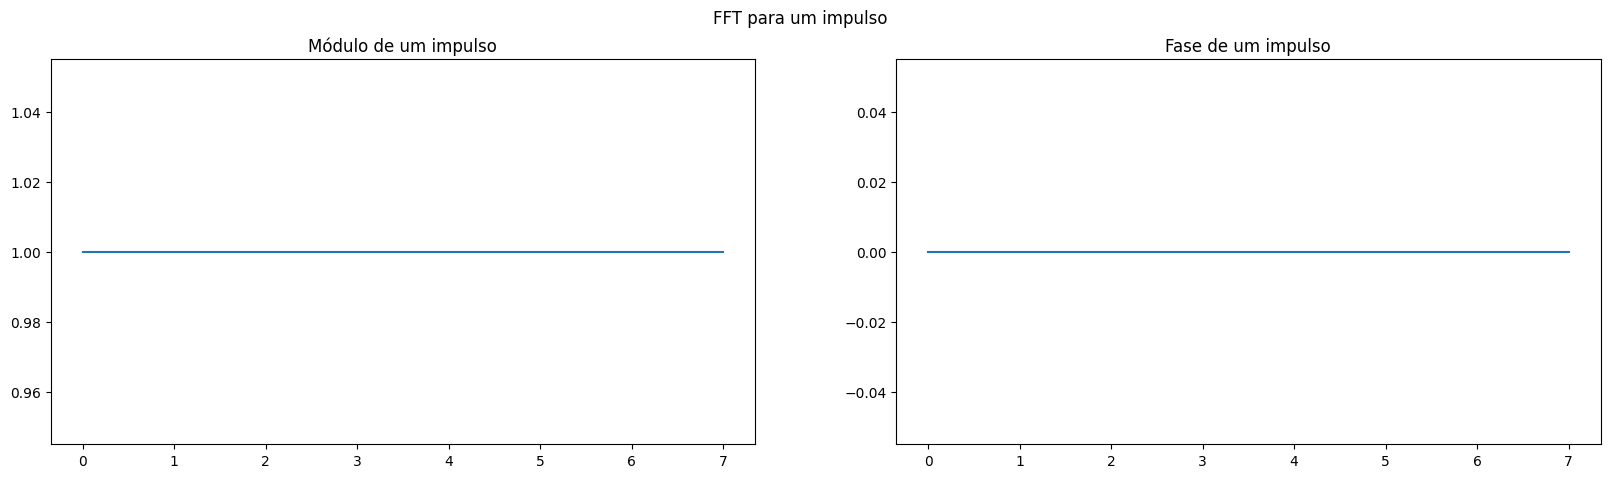

In [17]:
# Esboço gráfico da FFT para um impulso sem deslocamento
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
axs[0].plot(np.abs(my_fft([1,0,0,0,0,0,0,0])))
axs[0].set_title('Módulo de um impulso')
axs[1].plot(np.angle(my_fft([1,0,0,0,0,0,0,0])))
axs[1].set_title('Fase de um impulso')

fig.suptitle('FFT para um impulso')

Text(0.5, 0.98, 'FFT para um impulso deslocado')

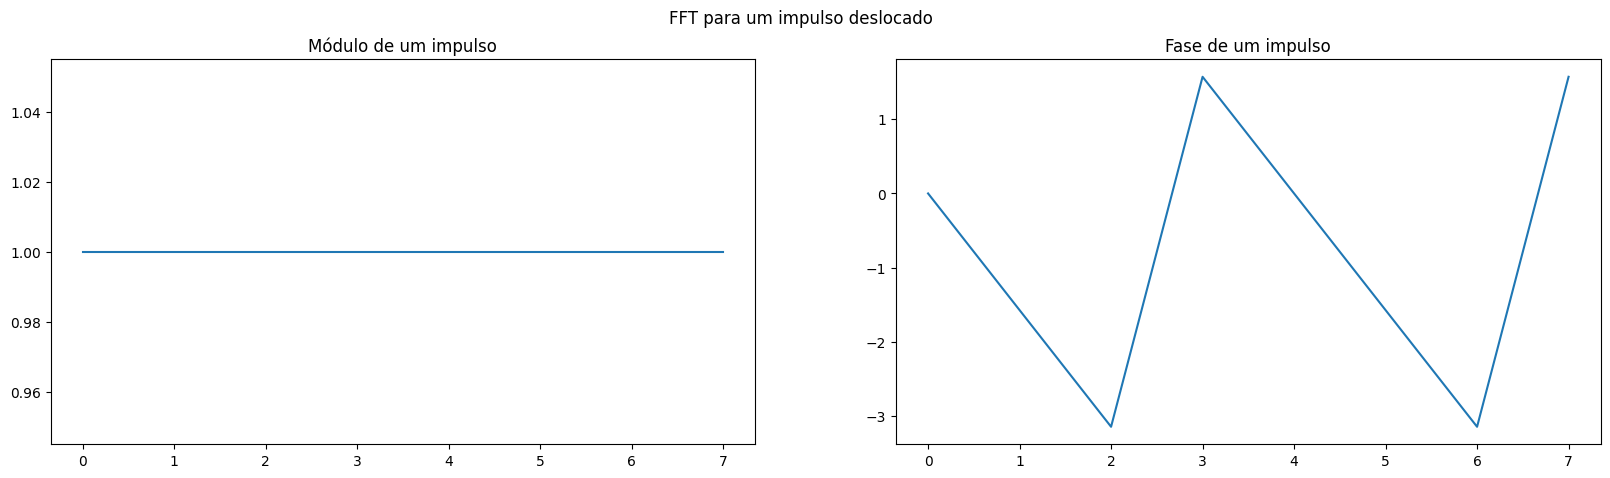

In [20]:
# Esboço gráfico da FFT para um impulso deslocado
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
axs[0].plot(np.abs(my_fft([0,0,1,0,0,0,0,0])))
axs[0].set_title('Módulo de um impulso')
axs[1].plot(np.angle(my_fft([0,0,1,0,0,0,0,0])))
axs[1].set_title('Fase de um impulso')

fig.suptitle('FFT para um impulso deslocado')